In [97]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import pearsonr
from skimage.filters import threshold_otsu
from skimage import filters, measure, segmentation, morphology
import tifffile as tf
plt.rcParams.update({'font.size': 16})

In [75]:
folder = '/Users/cuenca/Documents/Predoc Course/Pics/s3'

ch1 = glob.glob(folder + '/C1*.tif') 
ch2 = glob.glob(folder + '/C2*.tif') 
data1 = glob.glob(folder + '/ValuesC1*.csv') 
data2 = glob.glob(folder + '/ValuesC2*.csv') 

In [76]:
ch1 = tf.imread(ch1)
ch2 = tf.imread(ch2)
bl1 = pd.read_csv(data1[0])['Y'].values
bl2 = pd.read_csv(data2[0])['Y'].values

In [77]:
bln1 = bl1/bl1[0]
bln2 = bl2/bl2[0]


chn1, chn2 = [], []
for i, c in enumerate(ch1):
    chn1.append(c*(2-bln1[i]))
    chn2.append(ch2[i]*(2-bln2[i]))



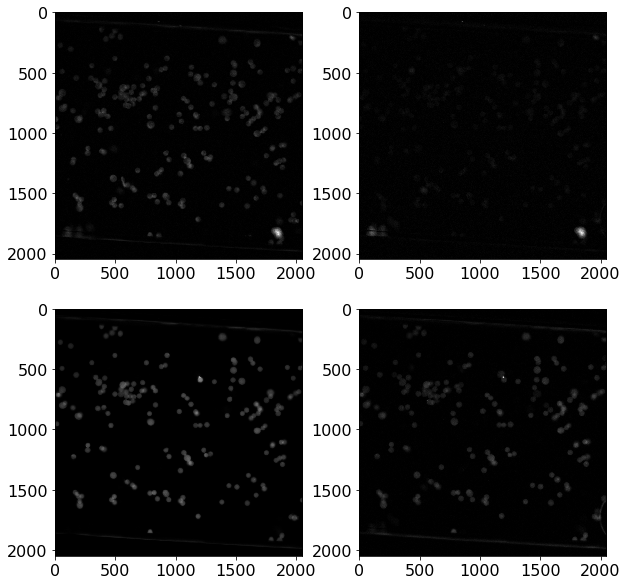

In [78]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.subplot(221)
plt.imshow(chn1[0], 'gray')

plt.subplot(222)
plt.imshow(chn1[-1], 'gray')

plt.subplot(223)
plt.imshow(chn2[0], 'gray')

plt.subplot(224)
plt.imshow(chn2[-1], 'gray')
plt.show()

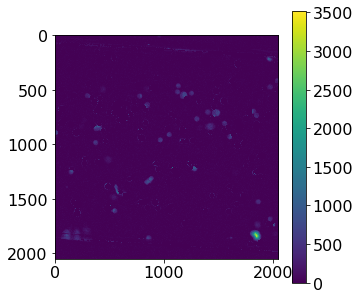

In [79]:
subs = chn1[0]/np.mean(np.mean(chn1[0]))-chn2[0]/np.mean(np.mean(chn2[0]))
bin_neg = subs >= 0
neg = bin_neg*chn1[0]
plt.rcParams["figure.figsize"] = [5, 5]
plt.imshow(neg, vmin=0)
plt.colorbar()
plt.show()

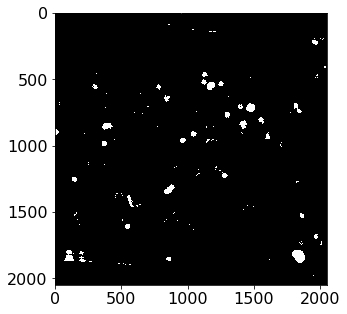

In [80]:

threshold_global_otsu = threshold_otsu(neg)
global_otsu = neg >= threshold_global_otsu


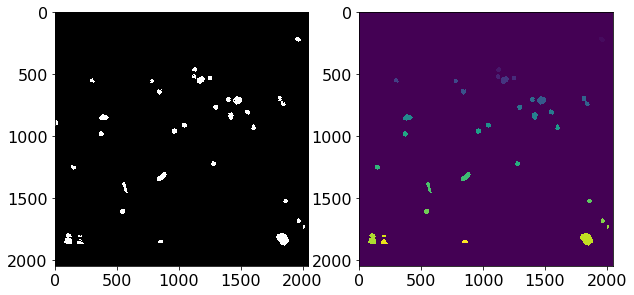

In [102]:
d = morphology.remove_small_objects(global_otsu, 250)
e = morphology.closing(d, morphology.disk(5))
cleared = segmentation.clear_border(e)
label_img = morphology.label(cleared, connectivity=cleared.ndim)
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(121)
plt.imshow(d, 'gray')
plt.subplot(122)
plt.imshow(label_img)
plt.show()

In [110]:
mean_i = []
for c in chn2:
    reg = measure.regionprops(label_img, c)
    i=[]
    for j, region in enumerate(reg):
        i.append(region.mean_intensity)
    mean_i.append(i)
        

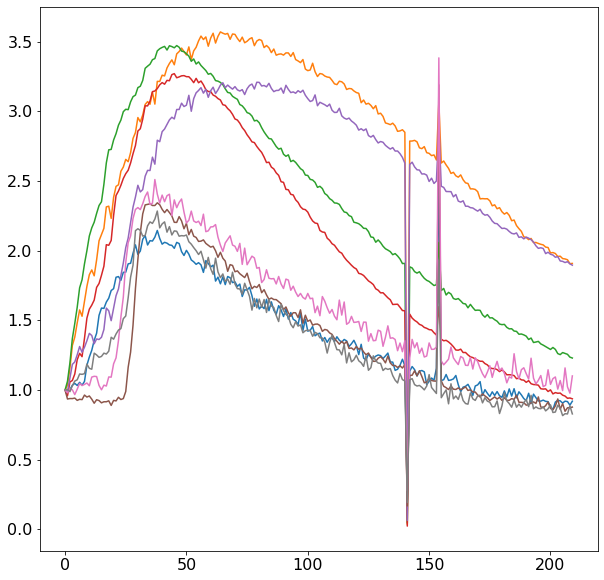

In [151]:
rs_meani = [list(x) for x in zip(*mean_i)]
index, coord = [], []
for j, a in enumerate(rs_meani):
    
    if np.max(a/a[0])<4 and a[50]/a[0]>2:
        index.append(j)
        coord.append(reg[j].centroid)
        plt.plot(a/a[0])

plt.show()

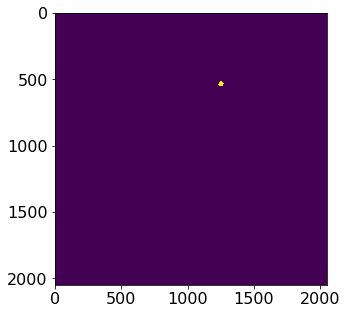

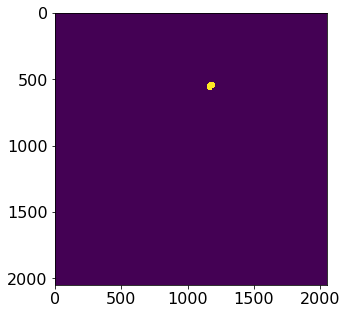

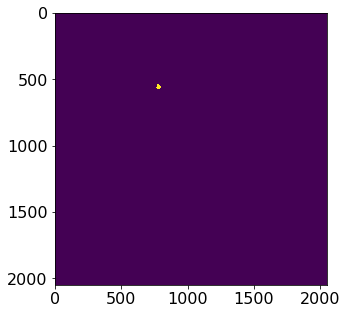

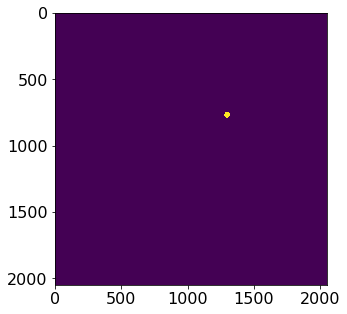

In [135]:
for ind in index:
    plt.imshow(label_img == ind)
    plt.show()

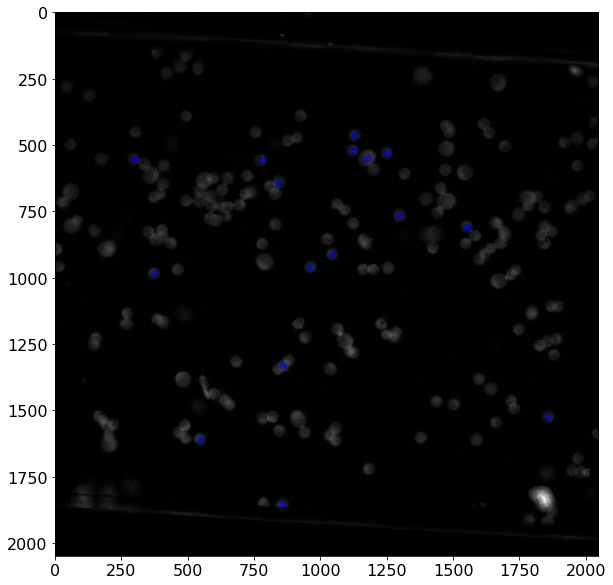

[(463.530749789385, 1126.312552653749),
 (519.1683848797251, 1121.1537800687286),
 (531.7051724137931, 1249.144827586207),
 (547.4145913714486, 1173.929849175728),
 (552.1931818181819, 301.3626033057851),
 (555.903023983316, 780.3211678832117),
 (641.303559435863, 841.4479516453996),
 (766.4961672473868, 1295.5630662020906),
 (807.1013094417643, 1550.908339076499),
 (910.5952380952381, 1042.8643578643578),
 (959.0435699226986, 962.3225579761069),
 (982.5175879396985, 371.8478104809763),
 (1329.1644144144145, 859.5464527027027),
 (1524.481447963801, 1858.4778280542987),
 (1606.2707182320441, 545.2486187845304),
 (1851.043694141013, 854.7050645481629)]

In [149]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.imshow(chn1[0], 'gray')
for cor in coord:
    plt.plot(cor[1], cor[0], 'ob', alpha = 0.5)
plt.show()
coord